<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Sesión Sincrónica Semana 2.

El objetivo de este cuaderno es cubrir las dudas, preguntas, y dificultades que detectamos en los trabajos entregados en la Semana 1 y hacer una introducción a la temática tratada en la semana 2.


**NO** es necesario editar el archivo o hacer una entrega. Los ejemplos contienen celdas con código ejecutable (`en gris`), que podrá modificar libremente. Esta puede ser una buena forma de aprender nuevas funcionalidades del *cuaderno*, o experimentar variaciones en los códigos de ejemplo.

# PCA

- Los datos suelen venir con información, redundancia y ruido. 


- Nuestro objetivo siempre es extraer la máxima información posible de los datos mientras reducimos el ruido e ignoramos la información redundante. 


- Al hacer esto esamos reduciendo la dimensión y es uno de los objetivo de PCA


- PCA nos permite resumir este conjunto de datos en un número pequeño de variables representativas.


- Para ello busca transformar los datos de forma tal que tengamos la máxima información posible. 


- Como se mide información? En PCA y en otrós metodos estadísticos utilizamos la varianza. 


- Si algo varía más entonces tiene más información.


- PCA identifica entonces eje que representa la mayor cantidad de variación en los datos.

- Como lo hace? A través de combinaciones lineales


- Por ejemplo, si tenemos 20 variables ($X_1, X_2, \dots, X_{20} $), el primer componente principal va a buscar la combinación lineal de estas 20 variables de forma tal que la información retenida sea la más alta posible
    
    
\begin{align}
PC_1 = \delta_{1,1} X_1+ \delta_{2,1} X_2 + \dots + \delta_{20,1} X_{20}
\end{align}

en donde $\delta_1$ es un vector de $20$ números reales $(\delta_1= \delta_{1,1},\dots, \delta_{20,1})$, que llamamos pesos o loadings y han sido normalizados para que $\sum_{j=1}^{20} \delta_{j1}^2=1$


- Podemos entonces calcular los componentes principales restantes, agregando la restricción de que este no este correlacionado con PC1.


- Una vez que identificamos todos los componentes principales, puede reducir la dimensionalidad del conjunto de datos a d dimensiones proyectándolo en el hiperplano definido por los primeros $d$ componentes principales.


- La selección de este hiperplano garantiza que la proyección conserve la mayor varianza posible.

- Es necesario hacer la advertencia de que los "loadings" de los componentes principales son únicos excepto por un cambio de signo. 
- Esto implica que dependiendo la implementación podemos obtener en dos librerias resultados distintos. 

- Los "loadings" serán los mismos pero los signos pueden diferir. 
- Los signos pueden diferir porque cada peso especifica una dirección en el espacio k-dimensional y el cambio de signo no tiene efecto sobre la dirección.  

## Importancia de Estandarizar: Ejemplo

In [1]:
#Cargamos las librerías a utilizar
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

np.set_printoptions(precision=2)

In [2]:
import pandas as pd

# Cargamos y visualizamos la primeras observaciones de los datos
X2 = pd.read_csv('data/simulated_data1.csv')
X2.head()

,X1,X2,X3
0,292.073677,0.598275,7.728396
1,296.744799,0.825057,8.476938
2,322.043464,0.835502,7.698411
3,300.997139,-0.142079,9.459228
4,301.828405,-0.513055,8.414136


In [3]:
X2.describe()

,X1,X2,X3
count,2000.000000,2000.000000,2000.000000
mean,300.414316,0.500578,8.225364
std,14.150074,0.498050,0.985148
min,256.896738,-1.131075,5.110912
25%,290.893115,0.165836,7.591981
50%,300.407479,0.507249,8.215160
75%,310.021001,0.832462,8.888358
max,347.947084,2.357860,11.661095


In [4]:
X2.cov()

,X1,X2,X3
X1,200.224593,-0.079115,-0.181300
X2,-0.079115,0.248054,0.007190
X3,-0.181300,0.007190,0.970517


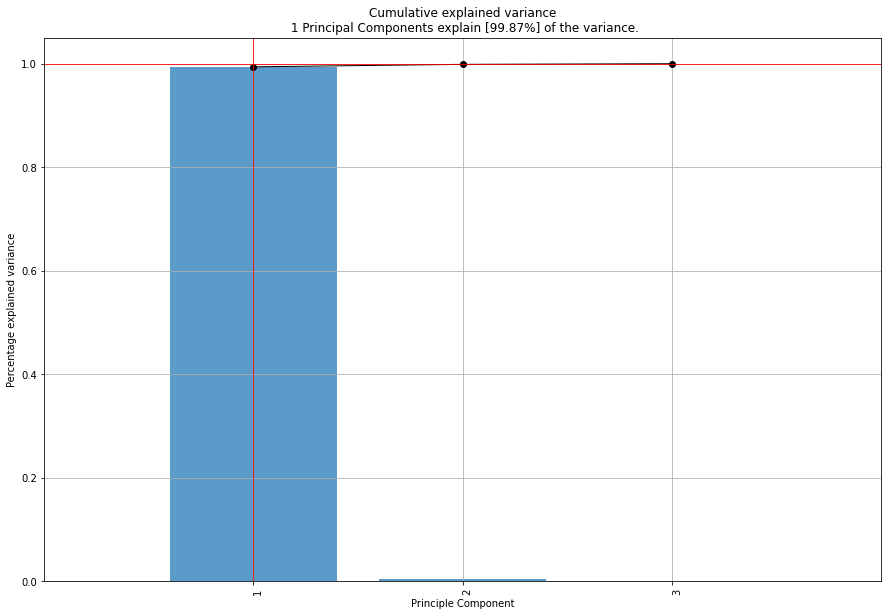

In [5]:
from pca import pca

model = pca()

results = model.fit_transform(X2, verbose=False)

# Plot explained variance
fig, ax = model.plot()

In [6]:
#ver los pesos o loadings
loadings_pca=model.results['loadings'].transpose()
loadings_pca

,PC1
X1,1.000000
X2,-0.000396
X3,-0.000910


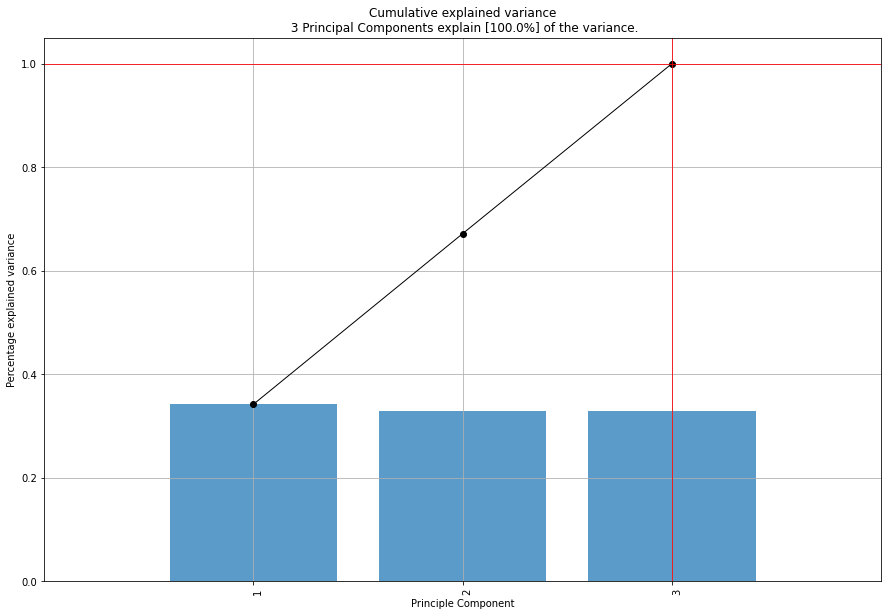

In [7]:
#PCA estandarizado
model_norm = pca( normalize=True, verbose=False)

# Fit transform
results_norm = model_norm.fit_transform(X2)

# Plot explained variance
fig, ax = model_norm.plot()

<AxesSubplot:xlabel='X1', ylabel='X2'>

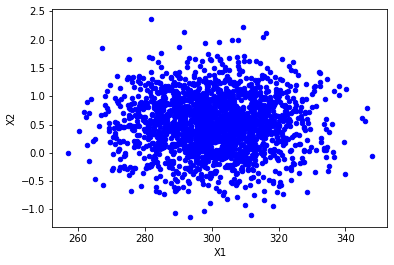

In [8]:
X2.plot.scatter(x="X1", y="X2", c ="blue")

<AxesSubplot:xlabel='X1', ylabel='X2'>

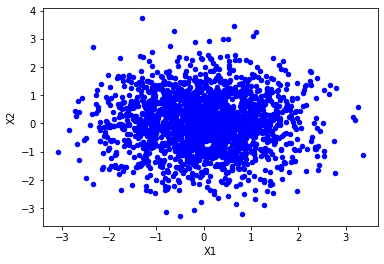

In [9]:
X2_std = (X2 - X2.mean())/X2.std()

X2_std.plot.scatter(x="X1", y="X2", c ="blue")

## Interpretación: Ejemplo Análisis estudiantes

In [10]:
# Cargamos y visualizamos  los datos
estudiantes = pd.read_csv('data/estudiantes.csv')
estudiantes = estudiantes.set_index("Estudiante")
estudiantes

,Matematica,Fisica,Literatura,Historia,Deportes
Estudiante,,,,,
Rosa,7.0,6.5,9.2,8.6,8.0
Juan Camilo,7.5,9.4,7.3,7.0,7.0
Daniel,7.6,9.2,8.0,8.0,7.5
Martina,5.0,6.5,6.5,7.0,9.0
Manuel,6.0,6.0,7.8,8.9,7.3
Mercedes,7.8,9.6,7.7,8.0,6.5
Pedro,6.3,6.4,8.2,9.0,7.2
Paola,7.9,9.7,7.5,8.0,6.0
Miguel,6.0,6.0,6.5,5.5,8.7


In [11]:
estudiantes.describe()

,Matematica,Fisica,Literatura,Historia,Deportes
count,10.000000,10.000000,10.000000,10.000000,10.00000
mean,6.790000,7.650000,7.740000,7.900000,7.42000
std,0.951548,1.609865,0.860491,1.121507,0.92832
min,5.000000,6.000000,6.500000,5.500000,6.00000
25%,6.075000,6.425000,7.350000,7.250000,7.00000
50%,6.900000,6.850000,7.750000,8.000000,7.25000
75%,7.575000,9.350000,8.150000,8.825000,7.87500
max,7.900000,9.700000,9.200000,9.000000,9.00000


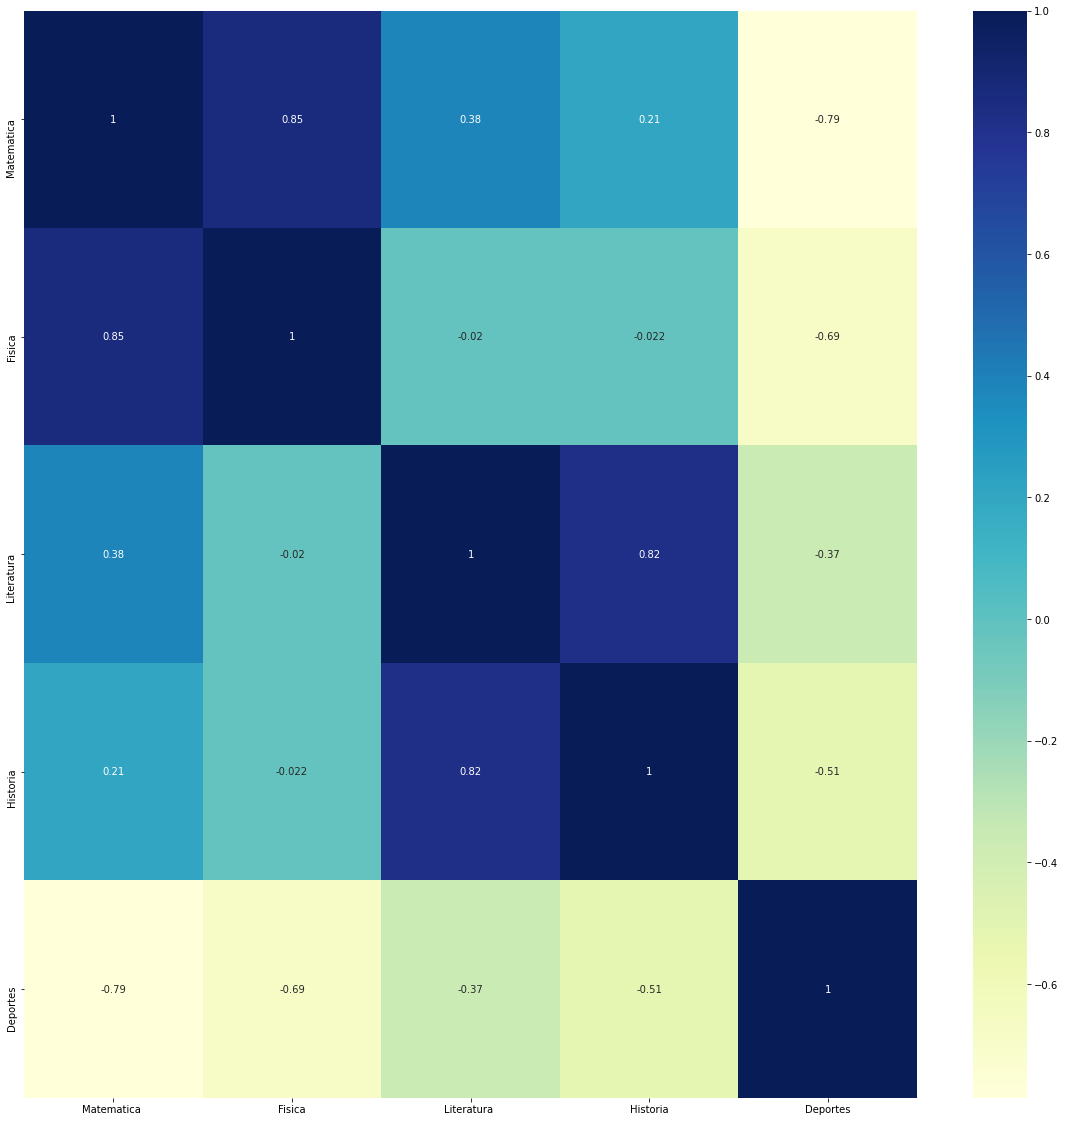

In [12]:
plt.figure(figsize=(20,20))
dataplot = sb.heatmap(estudiantes.corr(), cmap="YlGnBu", annot=True)
plt.show()

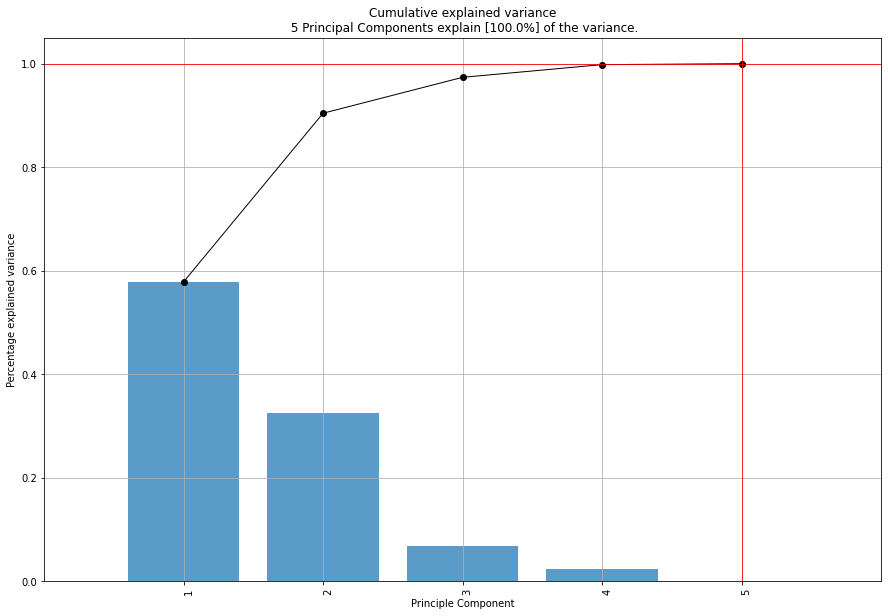

In [13]:
model_estudiantes = pca(n_components=5,normalize=True, verbose=0)
results_estudiantes = model_estudiantes.fit_transform(estudiantes)

fig, ax = model_estudiantes.plot()

In [14]:
#ver los pesos o loadings
loadings_estudiantes=model_estudiantes.results['loadings'].transpose()
loadings_estudiantes

,PC1,PC2,PC3,PC4,PC5
Matematica,-0.526644,-0.270496,0.438201,-0.261218,-0.623878
Fisica,-0.424936,-0.508072,0.040495,0.673627,0.325390
Literatura,-0.359147,0.562082,0.562276,-0.070086,0.483747
Historia,-0.352697,0.586490,-0.394180,0.446645,-0.420433
Deportes,0.537302,0.093746,0.578626,0.523056,-0.306794


[datazets] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
[datazets] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


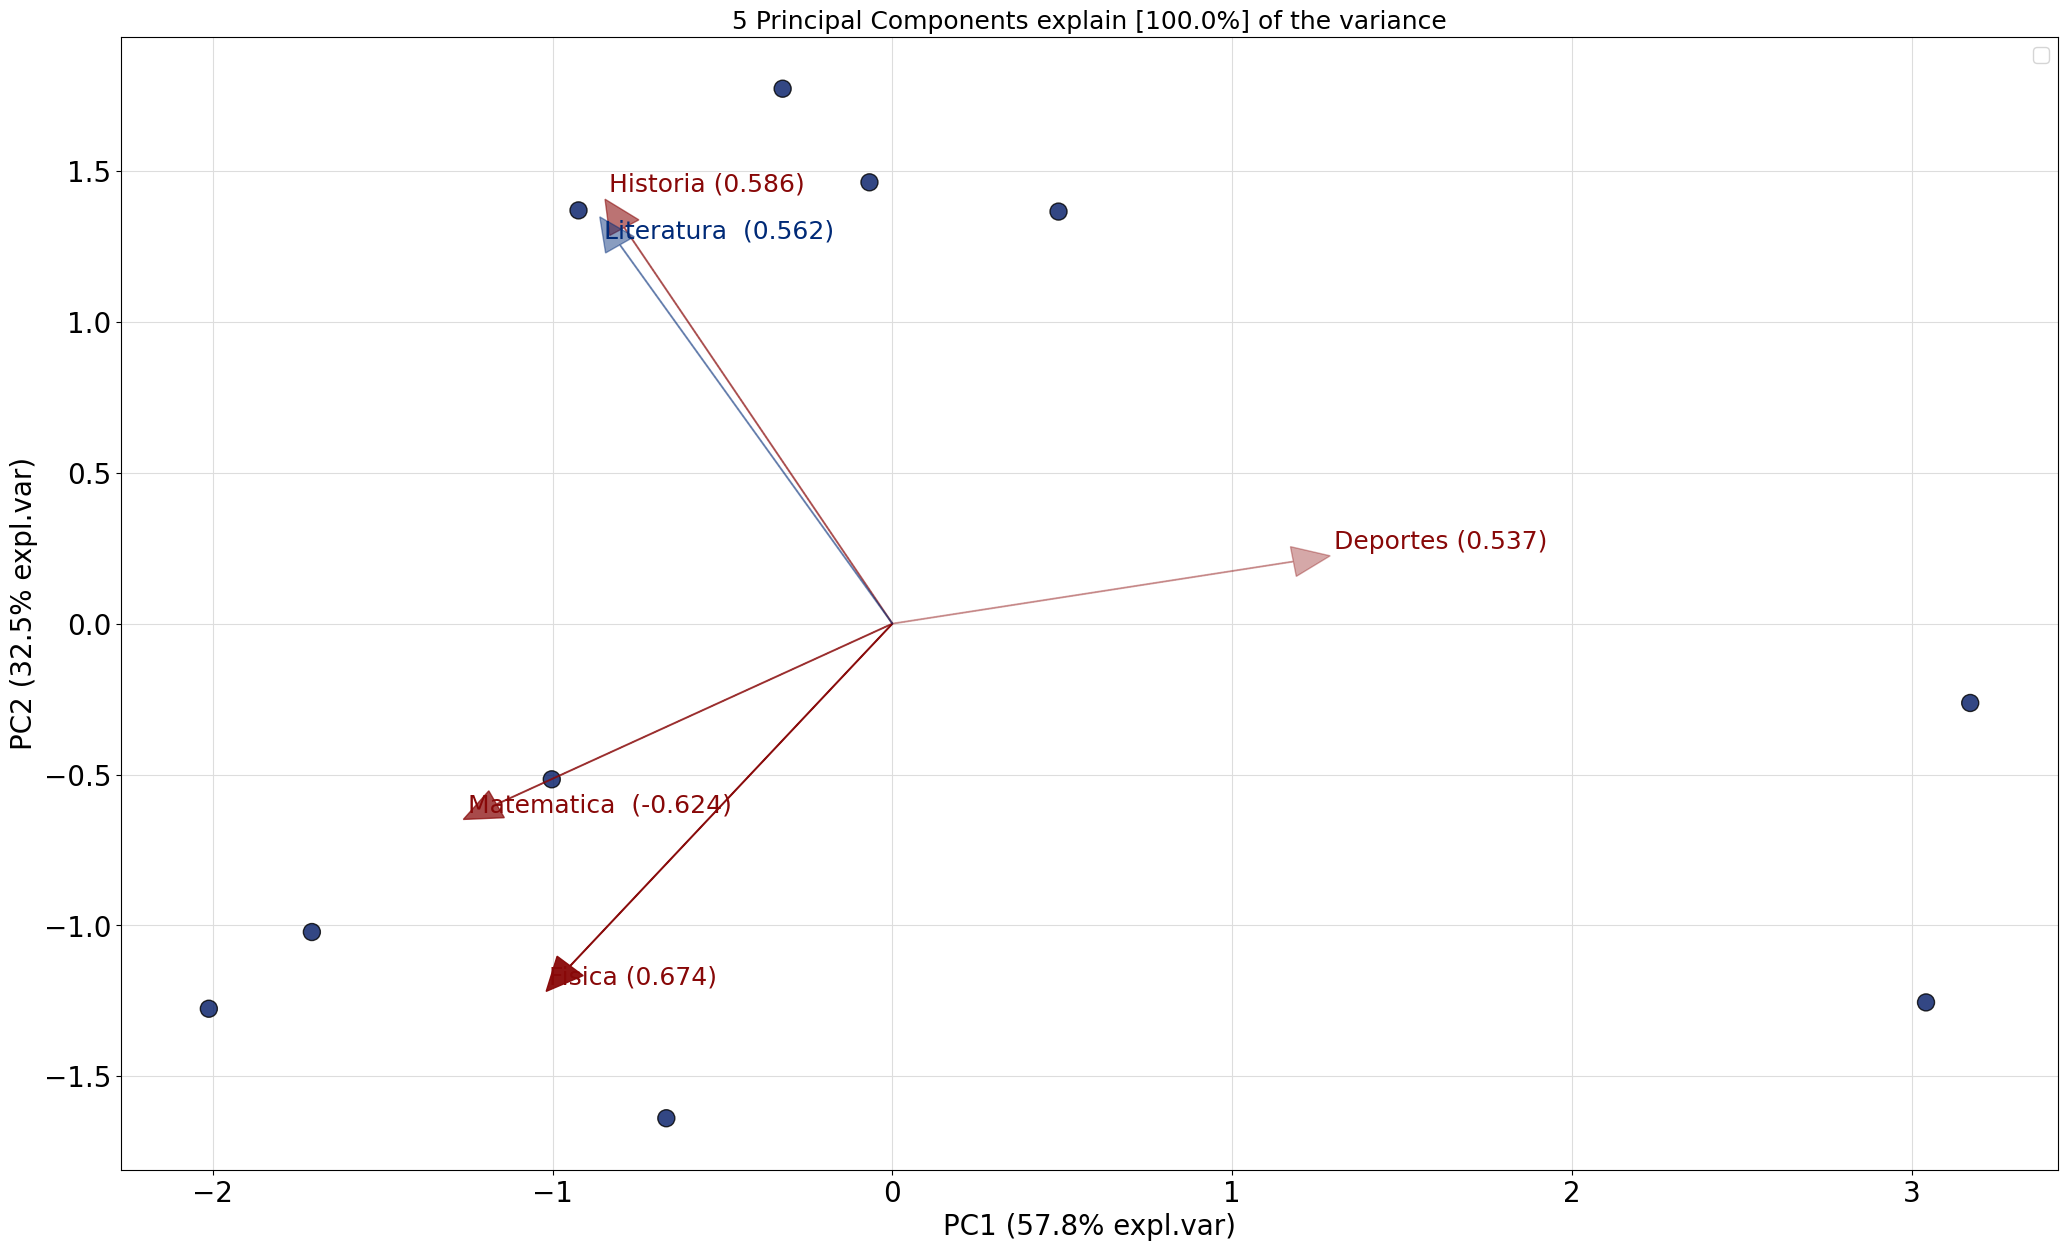

In [15]:
# Biplot
fig, ax = model_estudiantes.biplot(PC=[0, 1])

In [16]:
?pca.biplot

In [17]:
estudiantes_std= (estudiantes-estudiantes.mean())/estudiantes.std()
estudiantes_std.dot(loadings_estudiantes)

,PC1,PC2,PC3,PC4,PC5
Estudiante,,,,,
Rosa,-0.306484,1.681564,1.137282,-0.052192,-0.003447
Juan Camilo,-0.631292,-1.554609,0.138011,-0.021881,0.117046
Daniel,-0.951100,-0.489229,0.596615,0.489941,-0.135544
Martina,3.009313,-0.249297,-0.362359,0.642996,0.059296
Manuel,0.463781,1.295334,-0.792374,-0.147797,-0.117036
Mercedes,-1.620952,-0.969270,-0.120556,0.063403,-0.023994
Pedro,-0.064117,1.387294,-0.480262,-0.111877,-0.012451
Paola,-1.908613,-1.210391,-0.514329,-0.187637,-0.016540
Miguel,2.885923,-1.190484,0.425796,-0.607156,-0.035941


In [18]:
#fig, ax = model_estudiantes.biplot3d()

# Descomposición en Valores Singulares. 


En la segunda semana  nos enfocamos en otra forma de análisis matricial que conduce a representaciones de baja dimensión de matrices altamente dimensionales.

Este enfoque llamado descomposición en valores singulares (SVD), permite una representación exacta de cualquier matriz, facilitando también la eliminación de las partes menos importantes de esa representación. 

Por supuesto, cuantas menos dimensiones elijamos, menos precisa será la aproximación.


## Usos de la SVD

- Reducción de Dimensiones: Puede usarse para reducir la dimensionalidad de los datos, manteniendo la información más importante.
- Filtrado de Ruido: Ayuda a eliminar el ruido en los datos al conservar sólo los componentes principales.
- Recomendación: En sistemas de recomendación, SVD puede usarse para predecir los elementos que un usuario podría preferir.

## Diferencias entre SVD y PCA

    - Objetivo:
        - SVD descompone una matriz en tres matrices para revelar sus propiedades matemáticas.
        - PCA busca una proyección que capture la mayor varianza en los datos.

    - Metodología:
       -  SVD se aplica directamente a la matriz de datos.
       -  PCA se aplica a la matriz de covarianza de los datos, y a menudo se utiliza SVD en el proceso de calcular PCA.

    - Aplicación:
        - SVD tiene una variedad de aplicaciones en matemáticas, estadísticas y ciencias de la computación.
        - PCA se utiliza principalmente para la visualización y reducción de dimensiones en análisis de datos.

En resumen, aunque SVD y PCA pueden parecer similares y PCA incluso puede implementarse utilizando SVD, tienen objetivos y aplicaciones diferentes. SVD es una técnica más general y fundamental, mientras que PCA es una aplicación específica de análisis de datos que a menudo utiliza SVD en su cálculo.

Iniciamos este cuaderno con una introducción general y las definiciones matemáticas necesarias. Luego, en un primer ejemplo exploramos la interpretación de SVD y idea de que define una pequeña cantidad de "conceptos" que conectan las filas y columnas de la matriz y mostramos cómo eliminar los conceptos menos importantes nos da una representación más pequeña que se aproxima mucho a la matriz original. Finalmente, en un segundo ejemplo exploramos la idea de reconocimiento facial aplicados a los rostros de Olivetti.


## Definiciones

- Supongamos que $ X $ es una matriz $ n \times k $  con rango $ r $. Donde necesariamente, $ r \leq \min(n,k) $. (Recordemos que el [rango de una matriz](https://es.wikipedia.org/wiki/Rango_(%C3%A1lgebra_lineal)) es el número máximo de columnas (filas respectivamente) que son linealmente independientes.)


- Podemos pensar esta matriz $X$ como los datos

    - Cada fila es una observación
    - Cada columna es una variable aleatoria que describe un atributo.


### Singular Value Decomposition

La **descomposición en valores singulares** de una matriz $X$, $ n \times k $ matrix $ X $ de rango $ r \leq \min(n,k) $ es

$$
X  = U \Sigma V^T
$$

donde

$$
\begin{aligned}
UU^T &  = I  &  \quad U^T U = I \cr    
VV^T & = I & \quad V^T V = I
\end{aligned}
$$

en este caso

- $ U $ es una matriz $ n \times n $ cuyas columnas son eigen vectores de  $ X^T X $  

- $ V $ es una matriz $ k \times k $ cuyas columnas son eigen vectores de  $ X X^T $  

- $ \Sigma $ es una matriz $ n \times k $ en cuyos $ r $ lugares de su diagonal principal hay números positivos  $ \sigma_1, \sigma_2, \ldots, \sigma_r $ llamados **valores singulares**; y las entradas restantes de  $ \Sigma $ son todos ceros.

- Los $ r $ valores singulares son la raiz cuadrada de los eigen values de la matriz $ X X^T $ de dimension $ n \times n $ y de la matriz $ k \times k $ matrix $, X^T X $  



![](figs/svd_a3.png)


- En lo que llamamos  SVD completa (**full** SVD), las dimensiones de $ U $, $ \Sigma $, y $ V $ son $ \left(n, n\right) $, $ \left(n, k\right) $, $ \left(k, k\right) $, respectivamente:

\begin{align}
\underset{n\times k}{\underbrace{X}}=\underset{n\times n}{\underbrace{U}}\underset{n\times k}{\underbrace{S}}\underset{k\times k}{\underbrace{V'}}
\end{align}

- Pero también hay una forma alternativa llamada SVD reducida (o también llamada SVD delgada o de tamaño económico)  que evita calcular las las últimas columnas $n-k$ de U que serán multiplicadas por 0.  Denotamos esta descomposición con $\hat{U}\hat{S} \hat{V}'$: 

\begin{align}
\underset{n\times k}{\underbrace{X}}=\underset{n\times r}{\underbrace{\hat{U}}}\underset{r\times r}{\underbrace{\hat{S}}}\underset{r\times k}{\underbrace{\hat{V}'}}
\end{align}


Es decir  la SVD delgada expresa $ U $, $ \Sigma $, y $ V $ como matrices con dimensiones $ \left(n, r\right) $, $ \left(r, r\right) $, $ \left( k, r\right) $.

#### Propiedades de SVD completas

Para la SVD completa,

$$
\begin{aligned}
UU^T &  = I  &  \quad U^T U = I \cr    
VV^T & = I & \quad V^T V = I
\end{aligned}
$$

Pero estas propiedades no necesariamente se mantienen para las SVD reducidas

##### Short and Fat Matrices

Hay dos casos particulares que va ser esto útil

    1. Matrices cortas y gordas (**short and fat**) donde $ n << k $, es decir, hay mas columnas que filas.
    
    2. Matrices altas y flacas (**tall and skinny**), donde $ n >> k $, es decir, hay mas filas que columnas


Las propiedades se mantienen dependiendo si la matriz es **corta y gorda**(**short-fat**) o si es **alta y flaca** (**tall-skinny**)


- En el caso que es **corta y gorda** (**short-fat**)  para la SVD **reducida** 


$$
\begin{aligned}
UU^T &  = I  &  \quad U^T U = I \cr    
VV^T & = I & \quad V^T V \neq I
\end{aligned}
$$



- En el caso que es **alta y flaca** (**tall-skinny**) para la SVD **reducida** 


$$
\begin{aligned}
UU^T &  \neq I  &  \quad U^T U = I \cr    
VV^T & = I & \quad V^T V = I
\end{aligned}
$$




##### Ejemplo **corta y gorda** (**short-fat**)

Supongamos que $ n = 2 > k = 5 $.

In [19]:
import numpy as np
X = np.random.rand(2,5)
X.shape

(2, 5)

In [20]:
print(X)

[[0.17 0.51 0.18 0.12 0.69]
 [0.21 0.7  0.72 0.53 0.87]]


In [21]:
U, S, V = np.linalg.svd(X,full_matrices=True)  # full SVD

print('U, S, V ='), U, S, V

U, S, V =


(None,
 array([[-0.51, -0.86],
        [-0.86,  0.51]]),
 array([1.67, 0.32]),
 array([[-0.16, -0.51, -0.43, -0.31, -0.66],
        [-0.11, -0.25,  0.68,  0.51, -0.46],
        [-0.58,  0.51,  0.32, -0.5 , -0.23],
        [-0.42,  0.38, -0.51,  0.63, -0.16],
        [-0.67, -0.52,  0.04,  0.03,  0.53]]))

In [22]:
Uhat, Shat, Vhat = np.linalg.svd(X,full_matrices=False) # economy SVD
print('Uhat, Shat, Vhat = '), Uhat, Shat, Vhat

Uhat, Shat, Vhat = 


(None,
 array([[-0.51, -0.86],
        [-0.86,  0.51]]),
 array([1.67, 0.32]),
 array([[-0.16, -0.51, -0.43, -0.31, -0.66],
        [-0.11, -0.25,  0.68,  0.51, -0.46]]))

In [23]:
np.linalg.matrix_rank(X)

2

##### Ejemplo **alta y flaca** (**tall-skinny**)

Supongamos que $ n = 5 > k = 2 $.

In [24]:
import numpy as np
X = np.random.rand(5,2)
X.shape

(5, 2)

In [25]:
print(X)

[[0.64 0.83]
 [0.44 0.63]
 [0.67 0.74]
 [0.31 0.92]
 [0.8  0.27]]


In [26]:
U, S, V = np.linalg.svd(X,full_matrices=True)  # SVD completa 

print('U, S, V ='), U, S, V

U, S, V =


(None,
 array([[-0.52, -0.04, -0.5 , -0.16, -0.67],
        [-0.38, -0.09, -0.12, -0.71,  0.57],
        [-0.5 ,  0.09,  0.83, -0.06, -0.22],
        [-0.45, -0.59, -0.08,  0.58,  0.31],
        [-0.35,  0.79, -0.2 ,  0.35,  0.29]]),
 array([2.  , 0.57]),
 array([[-0.63, -0.78],
        [ 0.78, -0.63]]))

In [27]:
Uhat, Shat, Vhat = np.linalg.svd(X,full_matrices=False) # SVD economica, usar `full-matrices=False` retorna la SVD reducida

In [28]:
U.shape

(5, 5)

In [29]:
Uhat.shape

(5, 2)

In [30]:
#Rango
np.linalg.matrix_rank(X)


2

### SVD y reducción de dimensión

Existe una conexión mas profunda entre SVD y PCA. Si los valores singulares desaparecen rápidamente uno puede producir una aproximación de rango $l << k$ de forma que: 

\begin{align}
\underset{n\times k}{\underbrace{X}}\approx\underset{n\times l}{\underbrace{U}}\underset{l\times l}{\underbrace{S}}\underset{l\times n}{\underbrace{V'}}
\end{align}

Esta se conoce  como **SVD truncado**. Usando esta aproximación tenemos entonces que podemos representar una matriz $n\times k$ en una menor dimensión. Claramente, esta  ya no es una descomposición exacta de la matriz original $X$, sin embargo, es muy útil porque es la aproximación más cercana a $X$ que se puede lograr mediante una matriz de rango $l$.

En efecto, el **SVD truncado**  minimiza el error de aproximación medido por la norma de Frobenius, lo que equivale a minimizar el error cuadrático. Es decir, la SVD truncada minimiza la distancia al cuadrado entre cada punto de datos y su reconstrucción a partir de la representación de baja dimensión. 

### Ejemplo: Rostros de Olivetti.

In [31]:
# Librerias
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Cargar datos
oliveti_dataset = fetch_olivetti_faces(data_home="data")

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to data


In [32]:
oliveti_dataset.DESCR

'.. _olivetti_faces_dataset:\n\nThe Olivetti faces dataset\n--------------------------\n\n`This dataset contains a set of face images`_ taken between April 1992 and \nApril 1994 at AT&T Laboratories Cambridge. The\n:func:`sklearn.datasets.fetch_olivetti_faces` function is the data\nfetching / caching function that downloads the data\narchive from AT&T.\n\n.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html\n\nAs described on the original website:\n\n    There are ten different images of each of 40 distinct subjects. For some\n    subjects, the images were taken at different times, varying the lighting,\n    facial expressions (open / closed eyes, smiling / not smiling) and facial\n    details (glasses / no glasses). All the images were taken against a dark\n    homogeneous background with the subjects in an upright, frontal position \n    (with tolerance for some side movement).\n\n**Data Set Characteristics:**\n\n    ======

In [33]:
oliveti_dataset.images

array([[[0.31, 0.37, 0.42, ..., 0.37, 0.33, 0.31],
        [0.34, 0.4 , 0.44, ..., 0.37, 0.34, 0.31],
        [0.34, 0.42, 0.45, ..., 0.38, 0.34, 0.3 ],
        ...,
        [0.21, 0.21, 0.22, ..., 0.15, 0.17, 0.17],
        [0.2 , 0.21, 0.21, ..., 0.15, 0.16, 0.17],
        [0.2 , 0.21, 0.2 , ..., 0.15, 0.16, 0.16]],

       [[0.45, 0.47, 0.51, ..., 0.19, 0.19, 0.19],
        [0.45, 0.48, 0.52, ..., 0.21, 0.21, 0.21],
        [0.5 , 0.52, 0.53, ..., 0.2 , 0.21, 0.21],
        ...,
        [0.77, 0.78, 0.79, ..., 0.14, 0.14, 0.14],
        [0.77, 0.78, 0.79, ..., 0.14, 0.14, 0.14],
        [0.76, 0.79, 0.78, ..., 0.15, 0.15, 0.15]],

       [[0.32, 0.4 , 0.49, ..., 0.4 , 0.36, 0.31],
        [0.31, 0.4 , 0.48, ..., 0.4 , 0.38, 0.3 ],
        [0.27, 0.35, 0.45, ..., 0.4 , 0.37, 0.31],
        ...,
        [0.13, 0.1 , 0.08, ..., 0.14, 0.15, 0.15],
        [0.12, 0.1 , 0.08, ..., 0.14, 0.14, 0.16],
        [0.11, 0.09, 0.08, ..., 0.14, 0.15, 0.15]],

       ...,

       [[0.5 , 0.53, 0.6

In [34]:
n_samples, h, w = oliveti_dataset.images.shape

In [35]:
#Aplasto los datos para poder trabajar "mas intuitivamente" con las matrices
X = oliveti_dataset.data
X = pd.DataFrame(X)

y = oliveti_dataset.target
y = pd.DataFrame(y, columns=['pid']) # pid is person_id

df = y.join(X)
df.head()

,pid,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,...,0.665289,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025
1,0,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,...,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893
2,0,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893
3,0,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,...,0.652893,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669
4,0,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,...,0.190083,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554


In [36]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.400134,0.434235,0.476281,0.518482,0.554845,0.588729,0.621426,0.647511,0.664814,0.676591,...,0.363079,0.367221,0.363027,0.355506,0.340196,0.338657,0.335909,0.321415,0.313647,0.310455
std,0.180695,0.189504,0.194742,0.193313,0.188593,0.178481,0.167109,0.155024,0.147616,0.143583,...,0.164952,0.181861,0.181611,0.188709,0.186088,0.189256,0.195280,0.187842,0.183616,0.180635
min,0.086777,0.066116,0.090909,0.041322,0.107438,0.107438,0.115702,0.115702,0.119835,0.140496,...,0.049587,0.037190,0.053719,0.049587,0.033058,0.012397,0.049587,0.057851,0.061983,0.033058
25%,0.243802,0.267562,0.314050,0.383264,0.446281,0.515496,0.544421,0.581612,0.599174,0.611570,...,0.227273,0.214876,0.219008,0.197314,0.177686,0.177686,0.173554,0.173554,0.173554,0.172521
50%,0.392562,0.458678,0.512397,0.545455,0.584711,0.615702,0.652893,0.669421,0.683884,0.702479,...,0.367769,0.367769,0.342975,0.334711,0.320248,0.314050,0.299587,0.289256,0.270661,0.272727
75%,0.528926,0.575413,0.636364,0.666322,0.702479,0.714876,0.735537,0.757231,0.772727,0.780992,...,0.484504,0.496901,0.500000,0.500000,0.479339,0.462810,0.462810,0.446281,0.414256,0.417355
max,0.805785,0.822314,0.871901,0.892562,0.871901,0.871901,0.871901,0.871901,0.871901,0.871901,...,0.793388,0.904959,0.888430,0.896694,0.826446,0.863636,0.921488,0.929752,0.884298,0.822314


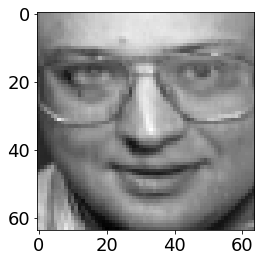

In [37]:
# Choose a figure to plot
img1=X.iloc[300].to_numpy().reshape(h,w)
plt.imshow(img1, cmap=plt.cm.gray)

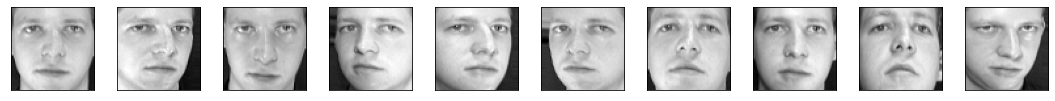

In [38]:
faces_tplot=df.drop(columns=['pid'])
n_row=1
n_col=10

plt.figure(figsize=(1.5 * n_col, 2.2 * n_row))
plt.subplots_adjust(0.6, 0.5, 1.5, 1.5)
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(faces_tplot.iloc[i].to_numpy().reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()
plt.show()

#### 3.1. Rostro promedio. 

 Encuentre el rostro promedio, para ello calcule la media por columnas o la media por píxel y grafíquelo.

- El objetivo es  encontrar las características que hacen que los individuos sean diferentes a los demás. 

-  La razón por la que esto es necesario es porque queremos crear un sistema que pueda representar cualquier rostro. 

- Por lo tanto, calculamos los elementos que todas las caras tienen en común (la media). 

- Si extraemos esta media de las imagen, se aprecian las características que distinguen cada fotografía del resto del conjunto. Maximizamos la varianza!

In [40]:
# Utilice este espacio para escribir el código.
Xmean = df.drop(columns=[ 'pid']).mean(axis=0)

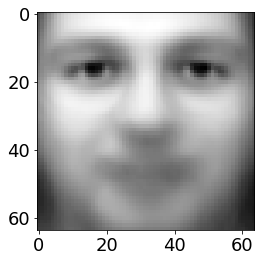

In [41]:
#plot the average face 
plt.imshow(Xmean.to_numpy().reshape((h, w)), cmap=plt.cm.gray)

#### 3.2. Reste el rostro promedio.

A cada una de las imágenes substraigale el rostro promedio.

In [42]:

Demean=df.drop(columns=['pid'])-Xmean 

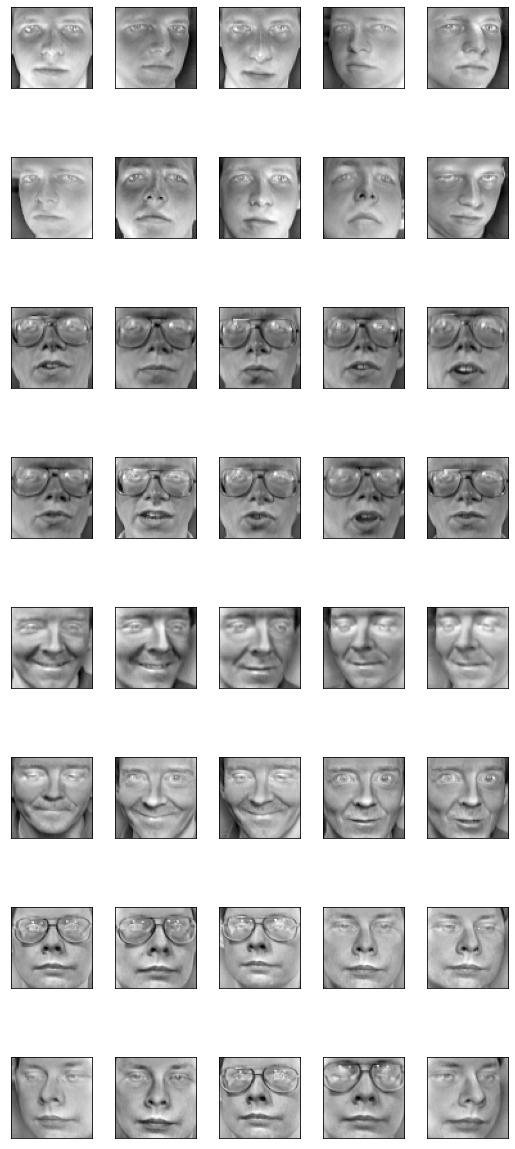

In [43]:
#Some examples
n_row=8
n_col=5

plt.figure(figsize=(1.5 * n_col, 2.2 * n_row))
plt.subplots_adjust(0.6, 0.5, 1.5, 1.5)
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(Demean.iloc[i].to_numpy().reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()
plt.show()

#### 3.3. Descomposición en Valores Singulares 

Aplique la Descomposición en Valores Singulares a estas nuevas imágenes y retenga solo $K$ eigen vectores que mejor representen las imágenes. Justifique su elección.

In [44]:
from scipy.linalg import svd #pueden explorar con sklearn
U,S,Vt = svd(X)

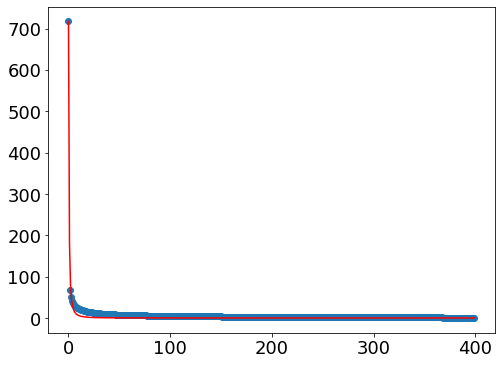

In [45]:
# observe cuan rapidamente caen los SVD
idx = range(len(S))
func = [S[0]/((i+1) ** 2) for i in idx ]

plt.figure(figsize = (8, 6))
plt.plot(idx, func, color = 'r')
plt.scatter(idx, S)

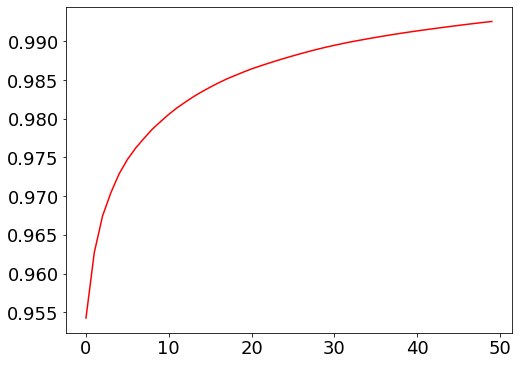

In [46]:
rg =50
idx = range(0,rg)
var_explained = np.round(S**2/np.sum(S**2), decimals=6)

cumsum=var_explained[0:rg].cumsum()

plt.figure(figsize = (8, 6))
plt.plot(idx,cumsum , color = 'r')


In [47]:
sum(var_explained[0:rg])

0.9925629720382858

In [48]:
n,k=X .shape

S2= np.resize(S,[n,1])*np.eye(n,k) #ponemos los valores singulares en una matriz diagonal

l = 10

reconstructed=np.dot(U[:,0:l],np.dot(S2[0:l,0:l],Vt[0:l,:]))
reconstructed = pd.DataFrame(reconstructed)
reconstructed

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.308737,0.368581,0.420691,0.462884,0.500987,0.565039,0.614440,0.649324,0.676051,0.695940,...,0.445536,0.426628,0.386314,0.342249,0.277421,0.228704,0.224217,0.197259,0.171471,0.179806
1,0.690192,0.735548,0.738541,0.728709,0.710729,0.710067,0.707660,0.714209,0.719309,0.715805,...,0.239384,0.214551,0.178121,0.147538,0.146989,0.143439,0.170883,0.191337,0.206383,0.207231
2,0.346581,0.413289,0.471039,0.509124,0.543812,0.601804,0.645052,0.675947,0.701344,0.718292,...,0.369719,0.343837,0.301273,0.259831,0.193035,0.146335,0.146909,0.122534,0.103419,0.118012
3,0.104491,0.092251,0.086459,0.108020,0.147827,0.202618,0.272623,0.356013,0.418344,0.472469,...,0.617378,0.638717,0.640916,0.644303,0.644390,0.651166,0.648331,0.614192,0.567762,0.536492
4,0.514831,0.562072,0.586469,0.600311,0.604296,0.623368,0.647311,0.684304,0.711841,0.726043,...,0.236883,0.215066,0.182483,0.155394,0.145115,0.134089,0.127977,0.133810,0.134746,0.135509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.421450,0.484432,0.542570,0.581678,0.620741,0.641027,0.663462,0.678503,0.689756,0.692012,...,0.279506,0.295236,0.311584,0.325178,0.298510,0.292139,0.280032,0.263024,0.247061,0.262445
396,0.281416,0.297525,0.311905,0.340880,0.369436,0.404732,0.461135,0.533880,0.582133,0.619443,...,0.500103,0.525360,0.539557,0.550778,0.557448,0.564678,0.530059,0.503469,0.463552,0.443828
397,0.518644,0.582655,0.629868,0.655410,0.675025,0.669893,0.679463,0.695585,0.704237,0.701924,...,0.208857,0.226401,0.251785,0.275093,0.269865,0.275526,0.247905,0.241068,0.229212,0.240346
398,0.171487,0.187368,0.204703,0.231240,0.264437,0.302515,0.361596,0.439626,0.494099,0.536965,...,0.587672,0.626104,0.639204,0.652318,0.640338,0.640031,0.603622,0.566293,0.518268,0.489752


In [49]:
imag10_index=df.loc[df['pid'] == 10].index
imag10=reconstructed.iloc[imag10_index]

imag10

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
100,0.387330,0.461497,0.578532,0.675952,0.740158,0.785806,0.822285,0.840037,0.845659,0.846210,...,0.323881,0.329300,0.317561,0.297594,0.238036,0.207332,0.150979,0.122695,0.121014,0.122265
101,0.426330,0.484800,0.583478,0.679166,0.743694,0.788090,0.824338,0.838835,0.841295,0.842702,...,0.331041,0.324582,0.312947,0.287415,0.248222,0.225633,0.180295,0.161877,0.162953,0.160315
102,0.418258,0.475279,0.572460,0.667908,0.732325,0.782268,0.822607,0.840373,0.845270,0.848251,...,0.349177,0.347013,0.336084,0.311958,0.273181,0.251268,0.208431,0.187807,0.186671,0.185685
103,0.394158,0.458999,0.565362,0.658750,0.718561,0.763927,0.794272,0.803491,0.803864,0.802264,...,0.361747,0.359832,0.331311,0.293420,0.232057,0.196729,0.153461,0.133725,0.141184,0.132391
104,0.582890,0.640143,0.697148,0.754598,0.789065,0.804408,0.809955,0.796465,0.780996,0.767914,...,0.335400,0.316756,0.290975,0.247620,0.219634,0.194264,0.179319,0.188382,0.200634,0.192300
105,0.456055,0.521394,0.621035,0.713375,0.772817,0.814598,0.846959,0.857753,0.857613,0.855901,...,0.302711,0.290778,0.273826,0.243314,0.200257,0.172813,0.127421,0.111883,0.115220,0.116106
106,0.496605,0.573187,0.676945,0.762269,0.812631,0.837529,0.851655,0.847090,0.836416,0.824563,...,0.304577,0.296717,0.271669,0.234073,0.177368,0.141631,0.093856,0.084557,0.096661,0.090341
107,0.590621,0.663432,0.744999,0.811635,0.848759,0.854174,0.852746,0.835119,0.814355,0.795317,...,0.337405,0.331383,0.313021,0.278894,0.235638,0.207028,0.171070,0.171380,0.184067,0.172529
108,0.507232,0.566683,0.651504,0.724265,0.767123,0.793134,0.806004,0.801478,0.791475,0.783015,...,0.386488,0.377392,0.345175,0.303514,0.252529,0.223074,0.196982,0.187864,0.201616,0.185127
109,0.404241,0.475232,0.587863,0.686044,0.748963,0.796406,0.830607,0.842990,0.845539,0.844162,...,0.282354,0.274584,0.251055,0.217635,0.161028,0.127181,0.077750,0.059033,0.065776,0.067837


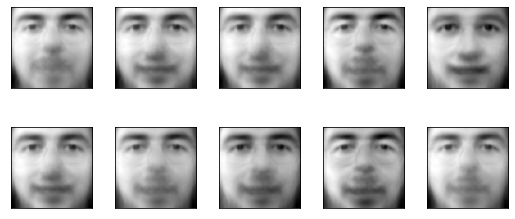

In [50]:
# Graficamos
n_row=2
n_col=5

plt.figure(figsize=(1.5 * n_col, 2.2 * n_row))
plt.subplots_adjust(0.6, 0.5, 1.5, 1.5)
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(imag10.iloc[i].to_numpy().reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()
plt.show()

# Información de Sesión

In [51]:
import session_info

session_info.show(html=False)

-----
matplotlib          3.5.3
numpy               1.18.4
pandas              1.0.3
pca                 2.0.3
scipy               1.4.1
seaborn             0.10.1
session_info        1.0.0
sklearn             0.22.2.post1
-----
IPython             7.14.0
jupyter_client      6.1.3
jupyter_core        4.6.3
jupyterlab          2.1.1
notebook            6.0.3
-----
Python 3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) [GCC 7.3.0]
Linux-5.15.0-1017-aws-x86_64-with-debian-buster-sid
-----
Session information updated at 2023-08-15 23:17
